# K-nearest neighbours

In [127]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance_matrix
import random

In [128]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Class'] = iris.target

In [291]:
class knn():
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.X1_range = np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1,50)
        self.X2_range = np.flip(np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1,50))
        
    def fit(self, k):
        distances_to_nn = []
        classification = []
        for x2,i in zip(self.X2_range, range(len(self.X2_range))):
            classification.append([])
            for x1,j in zip(self.X1_range, range(len(self.X1_range))):
                
                distances_to_nn = []
                grid_point = [x1,x2]
                
                for n in range(len(self.X_train)):
                    distances_to_nn.append([np.linalg.norm(grid_point - self.X_train[n]), n])
                    
                distances_to_nn.sort()

                knn_index = np.array(distances_to_nn)[:k,1]

                knn_labels = [self.y_train[int(index)] for index in knn_index]
                
                # Calculate class belonging
                classes = {np.sum(np.sum(np.array(knn_labels)==0)):0, np.sum(np.sum(np.array(knn_labels)==1)):1, np.sum(np.sum(np.array(knn_labels)==2)):2}

                most_common = max(classes.keys())
                
                classification[i].append(classes[most_common])
        classification = np.array(classification)
        
        x_grid, y_grid = np.meshgrid(self.X1_range, self.X2_range) 
        
        fig,ax = plt.subplots()

        ax.contourf(x_grid, y_grid ,classification)
        color = ['r','g','b']
        plt.scatter(self.X_train[:,0], self.X_train[:,1], c=self.y_train, edgecolors='white')

    def predict(self, X_train, y_train):
        
        pass
    

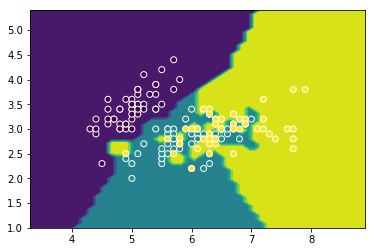

In [292]:
iris['data'][:,0:2]
knn_iris = knn(iris['data'][:,0:2],iris['target'])
knn_iris.fit(1)